In [1]:
import src.models
from experiments.plotting import plot_score_variable_y, plot_score_error_variable_y, load_checkpoint_wo_batch_stats

import orbax.checkpoint
from src.training import train_utils

Setup to load in checkpoint

In [2]:
orbax_checkpointer = orbax.checkpoint.PyTreeCheckpointer()

y_min = -1.0
max_val = 1.0
checkpoint_path = f"../../checkpoints/ou/varied_y_{y_min}_to_{max_val}"

score, restored = load_checkpoint_wo_batch_stats(checkpoint_path)
model = src.models.score_mlp.ScoreMLP(**restored["network"])
trained_score = train_utils.trained_score_variable_y(model, restored["params"], {})
# restored = orbax_checkpointer.restore(checkpoint_path)
# model = src.models.score_mlp.ScoreMLPDistributedEndpt(**restored["network"])
# params = restored["params"]
# 
# trained_score2 = train_utils.trained_score_variable_y(model, params)


In [3]:
from src.sdes import sde_ornstein_uhlenbeck
from tueplots import bundles, axes, cycler, figsizes
from tueplots.constants.color import palettes
import matplotlib.pyplot as plt

bundle = bundles.neurips2023()
plt.rcParams.update(bundle)
axes.lines()
plt.rcParams.update(cycler.cycler(color=palettes.paultol_muted))

true_score = sde_ornstein_uhlenbeck.score
cmap = "PuRd"

In [4]:
# plt.rcParams.update(figsizes.neurips2023(nrows=2, ncols=3))
# fig, axs = plot_score_variable_y(true_score, trained_score, -1, 1, -1, 1, cmap=cmap)
# plt.savefig('ou_score_varied_y_-1.0_to_1.0.pdf')
# plt.show()

TypeError: score() takes 2 positional arguments but 3 were given

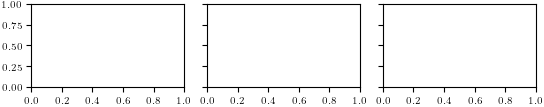

In [5]:
plt.rcParams.update(figsizes.neurips2023(nrows=1, ncols=3))
fig, axs = plot_score_error_variable_y(true_score, score, -1, 1, -1, 1, cmap=cmap)
plt.savefig('ou_score_varied_y_-1.0_to_1.0_error.pdf')
plt.show()

In [ ]:
plt.rcParams.update(figsizes.neurips2023(nrows=1, ncols=3))
fig, axs = plot_score_error_variable_y(true_score, trained_score2, -1, 1, -1, 1, cmap=cmap)
plt.savefig('ou_score_varied_y_-1.0_to_1.0_error.pdf')
plt.show()